# **1:** 



The data set used here shows the data of the passengers of Titanic and it is available in Kaggle. There are 12 attributes in the dataset which are: "Passenger ID", "Passenger Class", "Name", "Sex", "Age", "SibSp", "Parch", "Ticket", "Fare", "Cabin" and "Embarked."
The description of the attributes are as follows:
Survived- Survival (0 = No; 1 = Yes)
Pclass- Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
Name- Name of passenger,
Sex- Gender,
Age- Age of passenger,
Sibsp- Number of Siblings/Spouses onboard,
Parch- Number of Parents/Children onboard,
Ticket- Ticket Number,
Fare- Ticket Price,
Cabin- Cabin numbers,
Embarked- Port of Embarkation(C=Cherbourg; Q=Queenstown; S=Southampton).


#**2:** 

The dataset is divided into train and test set. Both the sets contain 1309 records in total. The train set contains 891 records and the train set contains 418 records. Train set contains 68% of data and test set contains the rest. 

Data Visualization
In this section we try to see different characteristics of the dataset.

In [ ]:
#Import Libraries
import numpy as np 
import pandas as pd 

import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [ ]:
#UPLOAD TRAIN TEST CSV FILE OF TITANIC
from google.colab import files
uploaded = files.upload()

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
all_data = [train,test]

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can see that Cabin, Age and Embarked has missing values which can hinder our end result.

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#**3.** 

Understanding and Visualizing Data

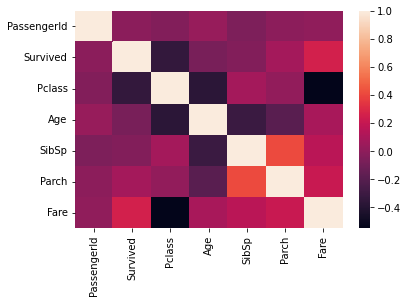

In [7]:
sns.heatmap(train.corr())

From above, the darker the red like the color the more the correlation and the darker the black in color the less the correlation. 

In [8]:
print (train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean())

      Sex  Survived
0  female  0.742038
1    male  0.188908


Sex       female  male
Survived              
0             81   468
1            233   109


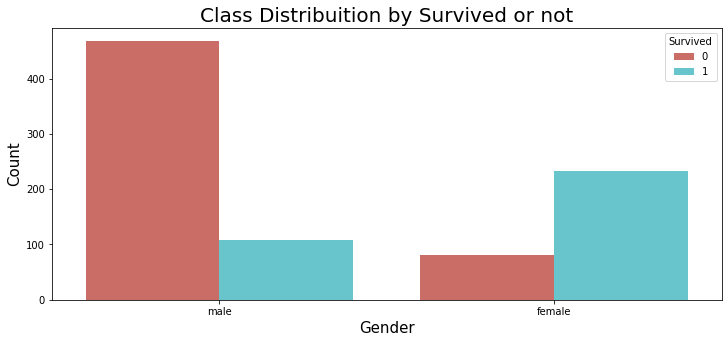

In [9]:
print(pd.crosstab(train.Survived, train.Sex))

plt.figure(figsize=(12,5))

sns.countplot(x="Sex", data=train, hue="Survived",palette="hls")
plt.xlabel('Gender',fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Class Distribuition by Survived or not', fontsize=20)

plt.show()

We can see from above that save "female and child first" strategy was applied here.

In [10]:
print (train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


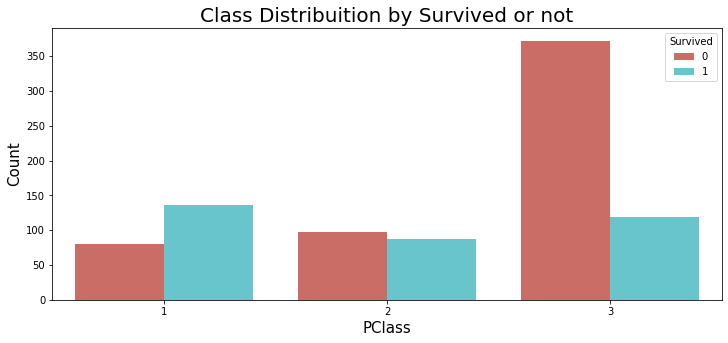

In [11]:
print(pd.crosstab(train.Survived, train.Pclass))

plt.figure(figsize=(12,5))

sns.countplot(x="Pclass", data=train, hue="Survived",palette="hls")
plt.xlabel('PClass',fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Class Distribuition by Survived or not', fontsize=20)

plt.show()

We can see from above that passengers with higher class survived more.

In [12]:
print (train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean())

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957


Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


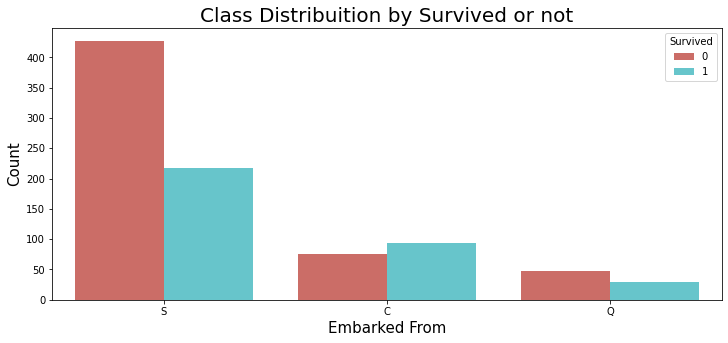

In [13]:
print(pd.crosstab(train.Survived, train.Embarked))

plt.figure(figsize=(12,5))

sns.countplot(x="Embarked", data=train, hue="Survived",palette="hls")
plt.xlabel('Embarked From',fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Class Distribuition by Survived or not', fontsize=20)

plt.show()

We can see from above that people who embarked from Southampton had high probabilities of not surviving.



In [14]:
print (train[['Age', 'Survived']].groupby(['Age'], as_index=False).mean())

      Age  Survived
0    0.42       1.0
1    0.67       1.0
2    0.75       1.0
3    0.83       1.0
4    0.92       1.0
..    ...       ...
83  70.00       0.0
84  70.50       0.0
85  71.00       0.0
86  74.00       0.0
87  80.00       1.0

[88 rows x 2 columns]


Age       0.42   0.67   0.75   0.83   0.92   ...  70.00  70.50  71.00  74.00  80.00
Survived                                     ...                                   
0             0      0      0      0      0  ...      2      1      2      1      0
1             1      1      2      2      1  ...      0      0      0      0      1

[2 rows x 88 columns]


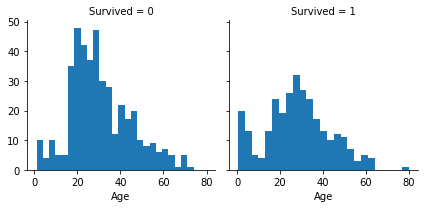

In [15]:
print(pd.crosstab(train.Survived, train.Age))
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=25)

We can see that infants had high survival rate, old aged passenger survived, most teens and millenials did not survive and most of the passengers are aged between 15 to 35.


Since parents, child and spouse are relatives thus we can combine all this attributes and visualise that attribute.

In [16]:
for dataset in all_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
print (train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


Survived      0    1
FamilySize          
1           374  163
2            72   89
3            43   59
4             8   21
5            12    3
6            19    3
7             8    4
8             6    0
11            7    0


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


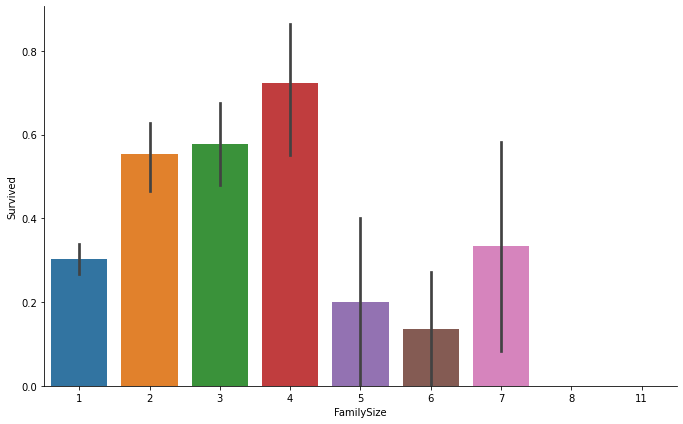

In [17]:
print(pd.crosstab(train.FamilySize, train.Survived))
sns.factorplot(x="FamilySize",y="Survived", data=train, kind="bar",size=6, aspect=1.6)
plt.show()


#**4.** 

New attributes and data cleaning will be done in this part.

PREPROCESSING

In [18]:
#Dropping Parch and Sibsp since it is irrelevant after inclusion of Relative.
train = train.drop(['Parch', 'SibSp'], axis=1)
test = test.drop(['Parch', 'SibSp'], axis=1)
all_data = [train, test]

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,1


In [19]:
#Cabin and Ticket features does not seem to impact in survival, moreover it has many disorganised data so I decided to drop these.
print('Shape Befor drop: ', train.shape)
train = train.drop(['Ticket', 'Cabin'], axis=1)
test = test.drop(['Ticket', 'Cabin'], axis=1)
all_data = [train, test]
print('Shape After drop: ',train.shape)

Shape Befor drop:  (891, 11)
Shape After drop:  (891, 9)


In [20]:
for dataset in all_data:
    # Turning Sex to numerical data for better efficiency of ML model.
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,8.0500,S,1


Replacing missing age values with (mean +- standard deviation)

In [21]:
#Replacing missing age values with (mean +- standard deviation)
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [22]:
for dataset in all_data:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_data = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_data.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,22,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",1,35,8.0500,S,1


In [23]:
train['Age_group'] = pd.cut(train['Age'], 5)
train[['Age_group', 'Survived']].groupby(['Age_group'], as_index=False).mean().sort_values(by='Age_group', ascending=True)

,Age_group,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [24]:
#Replacing Age with ordinals based on these groups.
for dataset in all_data:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",1,1,7.2500,S,2,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,71.2833,C,2,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",0,1,7.9250,S,1,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,53.1000,S,2,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",1,2,8.0500,S,1,"(32.0, 48.0]"


In [25]:
#Removing Age_group coloumn.
train = train.drop(['Age_group'], axis=1)
all_data = [train, test]
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,1,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",0,1,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",1,2,8.0500,S,1


Filling the 2 Missing Embarked values with most occuring embarking port.

In [26]:
for dataset in all_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
print (train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean())

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


In [27]:
# Turning Sex to numerical data for better efficiency of ML model.
for dataset in all_data:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,1,7.2500,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,71.2833,1,2
2,3,1,3,"Heikkinen, Miss. Laina",0,1,7.9250,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,53.1000,0,2
4,5,0,3,"Allen, Mr. William Henry",1,2,8.0500,0,1


In [28]:
#Dropping fare coloumn because it does not seem to be relevant to survival rate.
train = train.drop(['Fare'], axis=1)
test = test.drop(['Fare'], axis=1)
all_data = [train,test]
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,2
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,0,2
4,5,0,3,"Allen, Mr. William Henry",1,2,0,1


In [29]:
# Retain the new Title feature for model training.
for dataset in all_data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,0,1
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [30]:
#Replacing unusual titles with common titles
for dataset in all_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


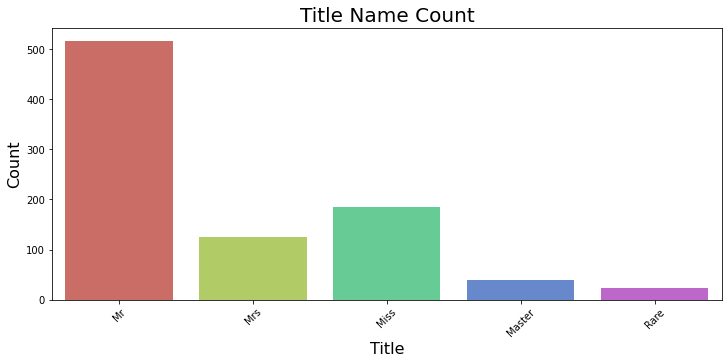

In [31]:
plt.figure(figsize=(12,5))

#Plotting the result
sns.countplot(x='Title', data=train, palette="hls")
plt.xlabel("Title", fontsize=16) #seting the xtitle and size
plt.ylabel("Count", fontsize=16) # Seting the ytitle and size
plt.title("Title Name Count", fontsize=20) 
plt.xticks(rotation=45)
plt.show()

In [32]:
#Converting the categorical titles to numerical titles.
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in all_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Embarked,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,2,3
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,0,2,3
4,5,0,3,"Allen, Mr. William Henry",1,2,0,1,1


In [33]:
#Now dropping Name and PassengerId coloumn in train set since this is irrelevant now.
train = train.drop(['Name', 'PassengerId'], axis=1)
test = test.drop(['Name'], axis=1)
all_data = [train, test]

In [34]:
train.head()

,Survived,Pclass,Sex,Age,Embarked,FamilySize,Title
0,0,3,1,1,0,2,1
1,1,1,0,2,1,2,3
2,1,3,0,1,0,1,2
3,1,1,0,2,0,2,3
4,0,3,1,2,0,1,1


In [35]:
test.head()

,PassengerId,Pclass,Sex,Age,Embarked,FamilySize,Title
0,892,3,1,2,2,1,1
1,893,3,0,2,0,2,3
2,894,2,1,3,2,1,1
3,895,3,1,1,0,1,1
4,896,3,0,1,0,3,3


#**5.** 

Model testing and selection. 


I decided to test various models from our course text book.

In [36]:
#Preparing Inputs for ML models
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()

In [54]:
#Apply and check Linear Regression
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, Y_train)

LNR_pred = linreg.predict(X_test)

acc_log1 = round(linreg.score(X_train, Y_train) * 100, 2)
print(round(acc_log1,2,), "%")

40.1 %


In [55]:
#Apply and check Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X_train, Y_train)

RR_pred=ridge_reg.predict(X_test)

acc_log2 = round(ridge_reg.score(X_train, Y_train) * 100, 2)
print(round(acc_log2,2,), "%")

40.1 %


In [57]:
#Apply and check Lasso Regression 
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, Y_train)
LSO_pred= lasso_reg.predict(X_test)

acc_log3 = round(lasso_reg.score(X_train, Y_train) * 100, 2)
print(round(acc_log3,2,), "%")

16.16 %


In [58]:
#Apply and check Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LR_pred = logreg.predict(X_test)

acc_log4 = round(logreg.score(X_train, Y_train) * 100, 2)
print(round(acc_log4,2,), "%")

80.25 %


In [59]:
#Apply and check Softmax Regression
from sklearn.linear_model import LogisticRegression
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X_train, Y_train)

SMR_pred= softmax_reg.predict(X_test)

acc_log5 = round(softmax_reg.score(X_train, Y_train) * 100, 2)
print(round(acc_log5,2,), "%")

80.13 %


In [60]:
#Apply and check Softmargin Classification
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
svm_clf = Pipeline([
("scaler", StandardScaler()),
("linear_svc", LinearSVC(C=1, loss="hinge")),
])

SM_CLF=svm_clf.fit(X_train, Y_train)


SMCLF_pred = svm_clf.predict(X_test)

acc_log6 = round(SM_CLF.score(X_train, Y_train) * 100, 2)
print(round(acc_log6,2,), "%")

78.68 %


In [61]:
#Apply and check Gaussian RBF Kernel
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
("scaler", StandardScaler()),
("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])

GRBF= poly_kernel_svm_clf.fit(X_train, Y_train)


GRBF_pred = poly_kernel_svm_clf.predict(X_test)

acc_log7 = round(GRBF.score(X_train, Y_train) * 100, 2)
print(round(acc_log7,2,), "%")

84.06 %


In [62]:
#Apply and check Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X_train, Y_train)

DT_pred = tree_clf.predict(X_test)

acc_log8 = round(tree_clf.score(X_train, Y_train) * 100, 2)
print(round(acc_log8,2,), "%")

81.71 %


In [63]:
#Apply and check Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X_train, Y_train)

DTR_pred = tree_reg.predict(X_test)

acc_log9 = round(tree_reg.score(X_train, Y_train) * 100, 2)
print(round(acc_log9,2,), "%")

39.51 %


In [64]:
#Apply and check RandomForestClassifier
random_forest= RandomForestClassifier(n_estimators=100,
                             max_features='auto',
                             criterion='entropy',
                             max_depth=10)
random_forest.fit(X_train, Y_train)

RFC_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_log10 = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_log10,2,), "%")

86.31 %


Selecting the best model from the table.

In [67]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 
              'Lasso Regression', 'Logistic Regression', 
              'Softmax Regression','Softmargin Classification',
              'Gaussian RBF Kernel','Decision Tree Classification',
              'Decision Tree Regression','RandomForestClassifier',],
    'Score': [ acc_log1, acc_log2, acc_log3, acc_log4,
               acc_log5, acc_log6, acc_log7, acc_log8,
               acc_log9, acc_log10 ]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(10)


,Model
Score,
86.31,RandomForestClassifier
84.06,Gaussian RBF Kernel
81.71,Decision Tree Classification
80.25,Logistic Regression
80.13,Softmax Regression
78.68,Softmargin Classification
40.10,Linear Regression
40.10,Ridge Regression
39.51,Decision Tree Regression


In [68]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.76666667 0.79775281 0.75280899 0.86516854 0.82022472 0.79775281
 0.80898876 0.74157303 0.84269663 0.83146067]
Mean: 0.8025093632958802
Standard Deviation: 0.037747179444727885


From above we can see that SoftMax Regression is a suitable choice.

Checking important features:

            importance
feature               
Title            0.277
Sex              0.190
FamilySize       0.190
Pclass           0.176
Age              0.111
Embarked         0.057


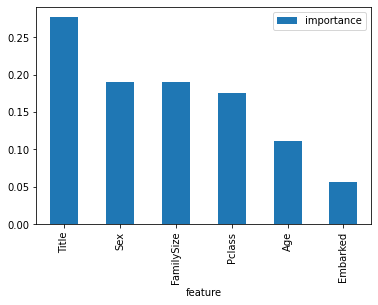

In [71]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
print(importances.head(15))
importances.plot.bar()

So, I will use SoftMax Regression to generate my predictions for submission.

In [72]:
submission = pd.DataFrame({
        "PassengerId": test['PassengerId'],
        "Survived":  SMR_pred
    })

submission.to_csv('NafiNibras_1831247042_submission.csv', index=False)